In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
client_data = pd.read_csv('client_data (1).csv')
price_data = pd.read_csv('price_data (1).csv')

In [6]:
# View the first few rows of the datasets
print(client_data.head())
print(price_data.head())

                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t

In [7]:
# Inspect column data types and non-null values
print(client_data.info())
print(price_data.info())

# Check for missing values
print(client_data.isnull().sum())
print(price_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
# Get summary statistics
print(client_data.describe())
print(price_data.describe())


           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000

In [9]:
# Inspect unique values in categorical columns
categorical_columns = client_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col} - Unique values: {client_data[col].nunique()}")


id - Unique values: 14606
channel_sales - Unique values: 8
date_activ - Unique values: 1796
date_end - Unique values: 368
date_modif_prod - Unique values: 2129
date_renewal - Unique values: 386
has_gas - Unique values: 2
origin_up - Unique values: 6


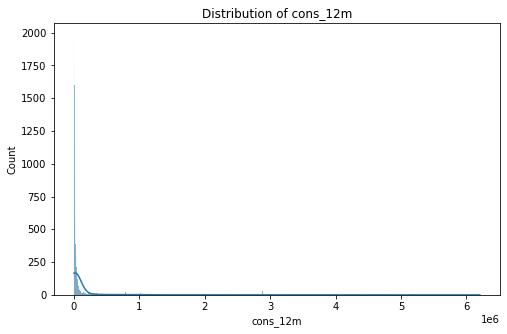

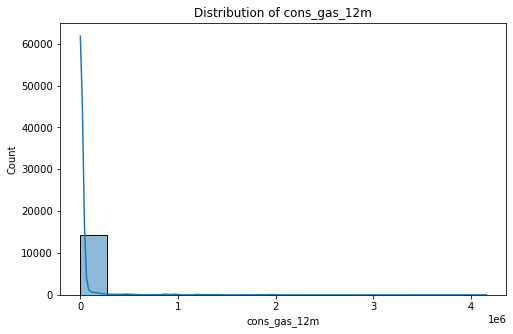

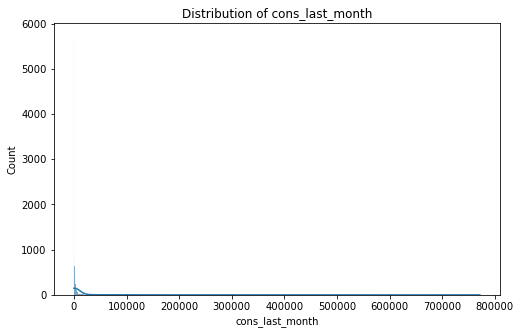

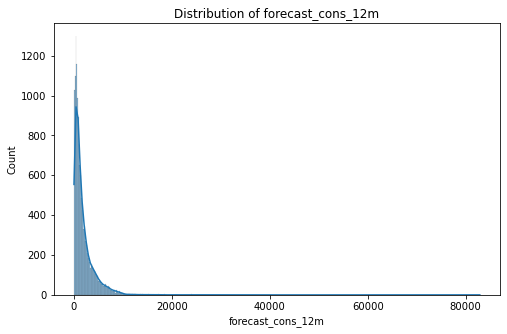

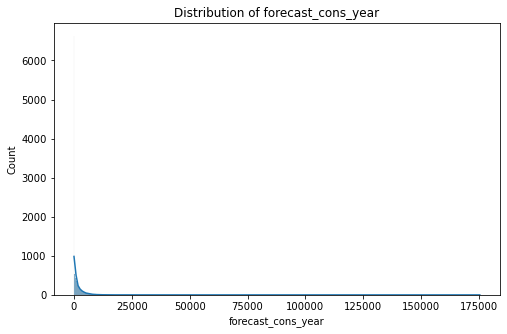

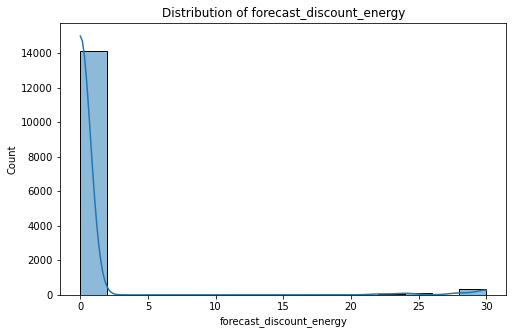

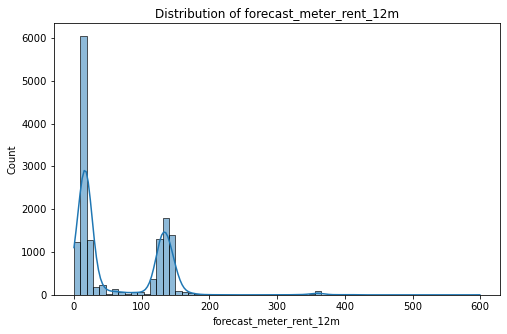

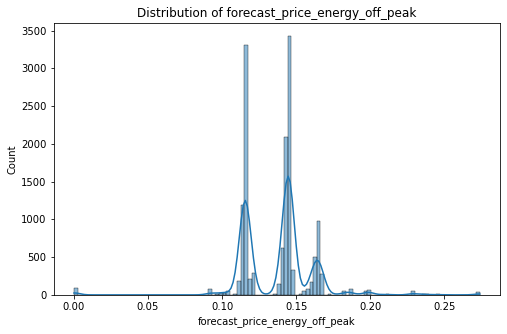

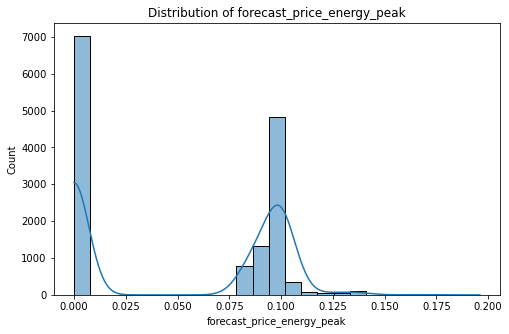

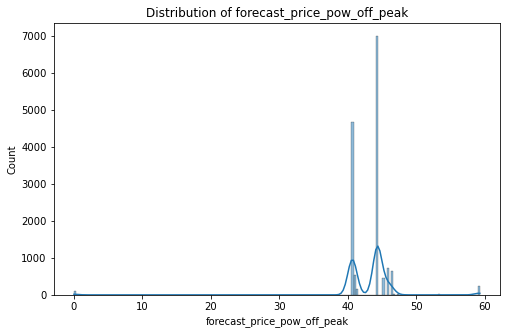

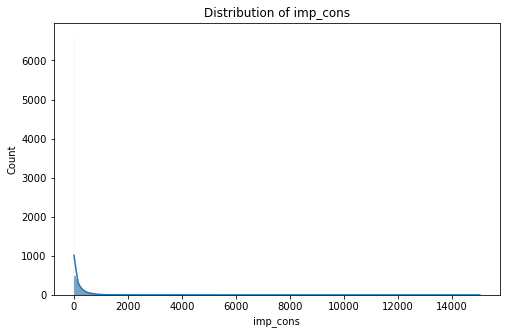

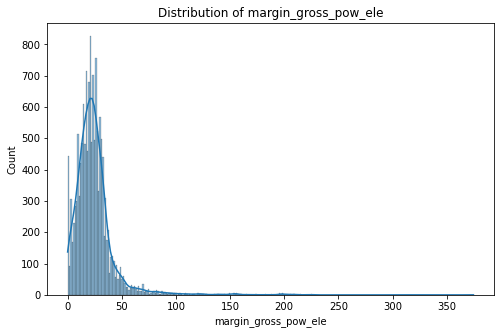

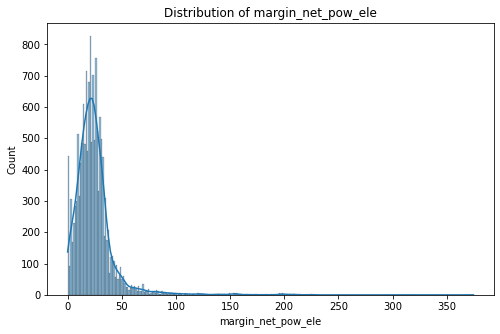

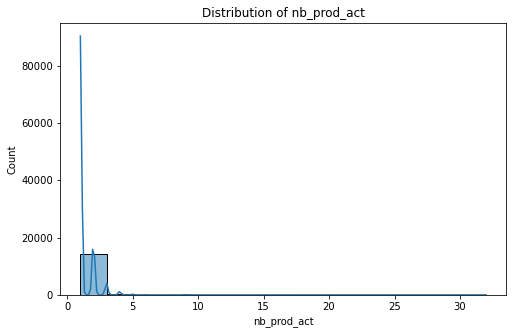

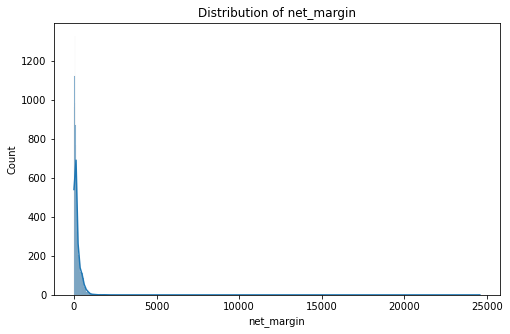

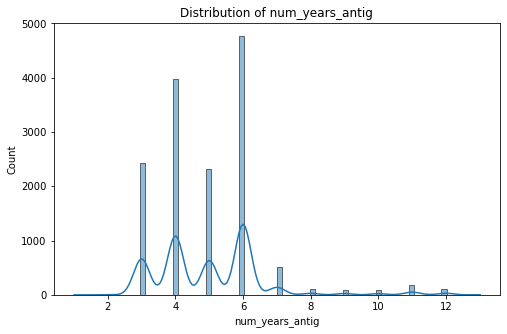

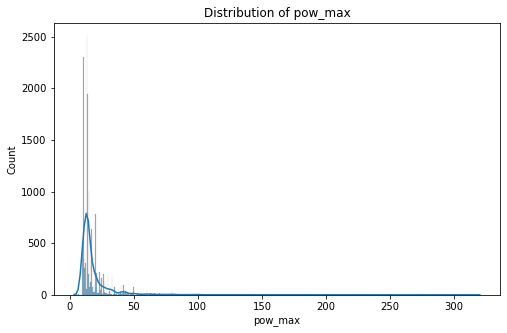

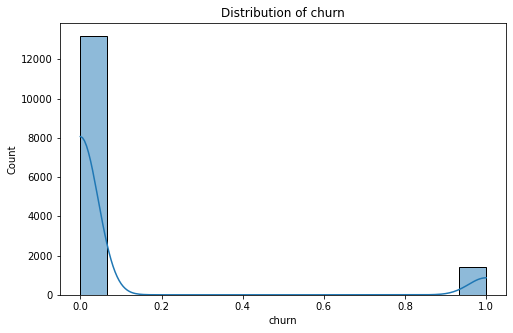

In [11]:
# Visualize distributions in client_data
for column in client_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(client_data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


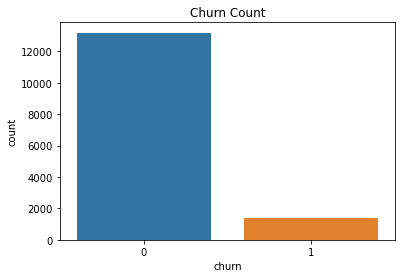

In [12]:
# Visualize churn distribution
sns.countplot(x='churn', data=client_data)
plt.title("Churn Count")
plt.show()


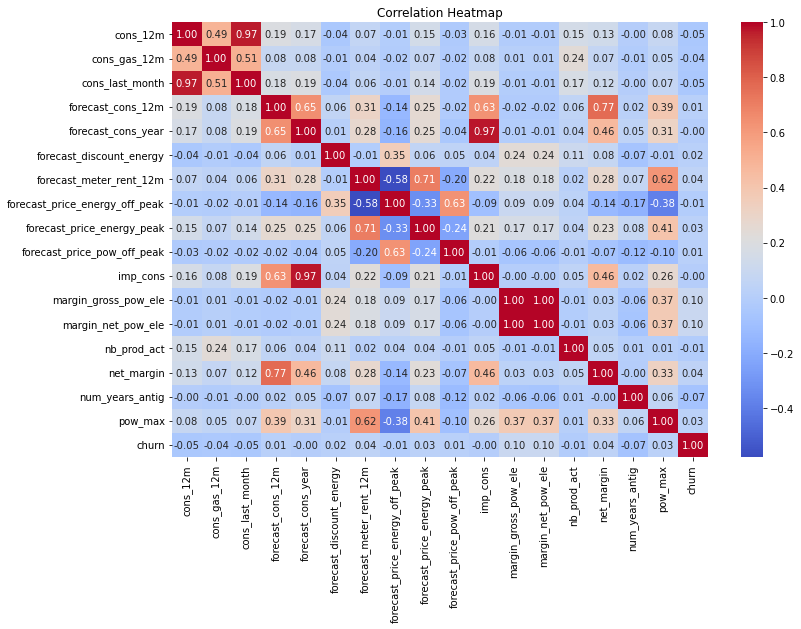

In [13]:
# Correlation heatmap for numerical columns in client_data
plt.figure(figsize=(12, 8))
sns.heatmap(client_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


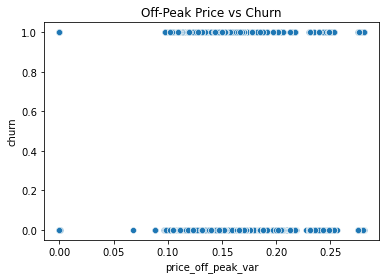

In [14]:
# Merge client_data and price_data for analysis
merged_data = pd.merge(client_data, price_data, on='id', how='inner')

# Scatter plot for price vs churn
sns.scatterplot(x='price_off_peak_var', y='churn', data=merged_data)
plt.title("Off-Peak Price vs Churn")
plt.show()
